# Quantitative results summary

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
fn_baseline_ce = '../results/csv/Baseline_CE_results.csv'
fn_cg_full_ce = '../results/csv/CG_Gland_Mask_Resized_Full_CE_results.csv'

fn_base = '../results/csv/'
lambd_array = np.linspace(0, 1, 6, dtype=np.float)
lambd_array = np.around(lambd_array, decimals=2)
# print(lambd_array)

results_list = list()
results_list.append(fn_baseline_ce)
results_list.append(fn_cg_full_ce)

for j, current_lambd in enumerate(lambd_array):
    fn_current = fn_base+'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_'+'lambd{}'.format(current_lambd)+'_results.csv'
#     print(fn_current)
    results_list.append(fn_current)

In [7]:
# Load all results into pandas
df_list = [pd.read_csv(f) for f in results_list]
df = pd.concat(df_list)
print('Found {} total results from {} experiments'.format(
    len(df),
    df['EXPERIMENT_ID'].nunique()
))
df = df.sort_values('EXPERIMENT_ID')

Found 1920 total results from 8 experiments


##  Select the maximum Dice among all λ values

In [76]:
# for CG - WG
df_lambda = df.copy()
df_lambda = df_lambda.loc[df_lambda['ROI']=='CG']
df_lambda = df_lambda.loc[df_lambda['ZONAL_ID']=='WG']
df_lambda.replace([np.inf, -np.inf], np.nan, inplace=True)
df_lambda.dropna(subset=['DICE'], inplace=True)

# mask out baseline
EXPERIMENT_ID = ['Baseline_CE', 'CG_Gland_Mask_Resized_Full_CE']
valid = ~(df_lambda['EXPERIMENT_ID'].isin(EXPERIMENT_ID))
df_lambda= df_lambda[valid].copy().reset_index()

# select the maximum Dice for each patients
df_lambda['lambda']=df_lambda['EXPERIMENT_ID'].apply(lambda s: s[-3:]).astype(float)
max_dice = (df_lambda.groupby(['SUBJECT_ID'])['DICE']).idxmax()
df_CG_max = df_lambda.iloc[max_dice]

# count lambda distribution
print(df_CG_max['lambda'].value_counts())

df_CG_max.describe()

0.0    16
0.4     8
0.6     5
0.8     1
Name: lambda, dtype: int64


,index,ROI_VALUE,DICE,HD95,MAD,INFERENCE_TIME,SUBJECT_ID,lambda
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,117.000000,2.0,0.915727,4.834419,0.444743,0.003184,15.500000,0.233333
std,70.427267,0.0,0.047452,2.295811,0.161883,0.000434,8.803408,0.268242
min,1.000000,2.0,0.776638,2.000000,0.256925,0.002840,1.000000,0.000000
25%,59.000000,2.0,0.908826,3.040569,0.304163,0.002929,8.250000,0.000000
50%,117.000000,2.0,0.929071,4.242641,0.382407,0.003042,15.500000,0.000000
75%,175.000000,2.0,0.942331,5.809355,0.588696,0.003119,22.750000,0.400000
max,233.000000,2.0,0.969344,11.704700,0.824584,0.004555,30.000000,0.800000


In [86]:
# for PZ - WG
df_lambda1 = df.copy()
df_lambda1 = df_lambda1.loc[df_lambda1['ROI']=='PZ']
df_lambda1 = df_lambda1.loc[df_lambda1['ZONAL_ID']=='WG']

# mask out baseline
EXPERIMENT_ID = ['Baseline_CE', 'CG_Gland_Mask_Resized_Full_CE']
valid = ~(df_lambda1['EXPERIMENT_ID'].isin(EXPERIMENT_ID))
df_lambda1= df_lambda1[valid].copy().reset_index()

# select cprresponding PZ with respect to CG
df_lambda1['lambda']=df_lambda1['EXPERIMENT_ID'].apply(lambda s: s[-3:]).astype(float)
df_PZ_max = df_CG_max[['SUBJECT_ID','lambda']].merge(df_lambda1,on=['SUBJECT_ID','lambda'],how='left')

# count lambda distribution
print(df_PZ_max['lambda'].value_counts())

df_PZ_max.describe()

0.0    16
0.4     8
0.6     5
0.8     1
Name: lambda, dtype: int64


,SUBJECT_ID,lambda,index,ROI_VALUE,DICE,HD95,MAD,INFERENCE_TIME
count,30.000000,30.000000,30.000000,30.0,29.000000,30.000000,30.000000,30.000000
mean,15.500000,0.233333,116.000000,1.0,0.765793,inf,inf,0.003184
std,8.803408,0.268242,70.427267,0.0,0.158275,NaN,NaN,0.000434
min,1.000000,0.000000,0.000000,1.0,0.342575,2.236068,0.329661,0.002840
25%,8.250000,0.000000,58.000000,1.0,0.735730,3.250000,0.603281,0.002929
50%,15.500000,0.000000,116.000000,1.0,0.827922,5.147586,1.237210,0.003042
75%,22.750000,0.400000,174.000000,1.0,0.870594,9.731551,1.993683,0.003119
max,30.000000,0.800000,232.000000,1.0,0.917215,inf,inf,0.004555


## Quantitative results for all λ values

In [78]:
df_CG = df.loc[df['ROI']=='CG']
df_CG = df_CG.loc[df_CG['ZONAL_ID']=='WG']
print('CG length',len(df_CG))
df_CG.groupby(['EXPERIMENT_ID']).describe()['DICE']

CG length 240


,count,mean,std,min,25%,50%,75%,max
EXPERIMENT_ID,,,,,,,,
Baseline_CE,30.0,0.412508,0.152399,0.065755,0.319235,0.440407,0.506442,0.694805
CG_Gland_Mask_Resized_Full_CE,30.0,0.901908,0.039371,0.796859,0.887411,0.907591,0.929114,0.963848
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.0,30.0,0.913938,0.048356,0.776140,0.900925,0.928046,0.942267,0.968760
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.2,30.0,0.913903,0.048142,0.776381,0.900913,0.927859,0.942270,0.968958
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.4,30.0,0.913880,0.047720,0.776638,0.900962,0.927527,0.942183,0.969344
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.6,30.0,0.886187,0.063020,0.727124,0.845655,0.911840,0.930286,0.952955
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.8,30.0,0.836585,0.091556,0.608243,0.772489,0.871024,0.909531,0.934015
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd1.0,30.0,0.788968,0.105427,0.525422,0.727479,0.818737,0.869866,0.924203


In [79]:
df_PZ = df.loc[df['ROI']=='PZ']
df_PZ = df_PZ.loc[df_PZ['ZONAL_ID']=='WG']
print('PZ length',len(df_PZ))
df_PZ.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_PZ.dropna(subset=['HD95'], inplace=True)
df_PZ.groupby(['EXPERIMENT_ID']).describe()['DICE']

PZ length 240


,count,mean,std,min,25%,50%,75%,max
EXPERIMENT_ID,,,,,,,,
Baseline_CE,29.0,0.153918,0.117228,0.000000,0.051920,0.147735,0.254624,0.405625
CG_Gland_Mask_Resized_Full_CE,29.0,0.733585,0.170071,0.341774,0.722031,0.794586,0.849378,0.903428
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.0,29.0,0.765576,0.157447,0.342575,0.735730,0.827922,0.869911,0.915809
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.2,29.0,0.765218,0.158054,0.341617,0.736284,0.826925,0.870072,0.916342
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.4,29.0,0.764575,0.159197,0.339243,0.736012,0.824999,0.870594,0.917215
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.6,29.0,0.712998,0.209061,0.161341,0.644440,0.788522,0.851225,0.898604
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.8,29.0,0.639785,0.218247,0.120754,0.553692,0.700387,0.811442,0.880058
CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd1.0,29.0,0.570649,0.212707,0.107237,0.489190,0.614520,0.738069,0.853722


## Box plot

In [111]:
data_ori = df[df['ZONAL_ID']=='WG']
# print(len(data_ori))

df_max = pd.concat([df_CG_max, df_PZ_max], join="inner")
df_max['EXPERIMENT_ID'] = 'MaxDice'

df_cat = pd.concat([data_ori, df_max], join="inner")
# print(len(df_cat))

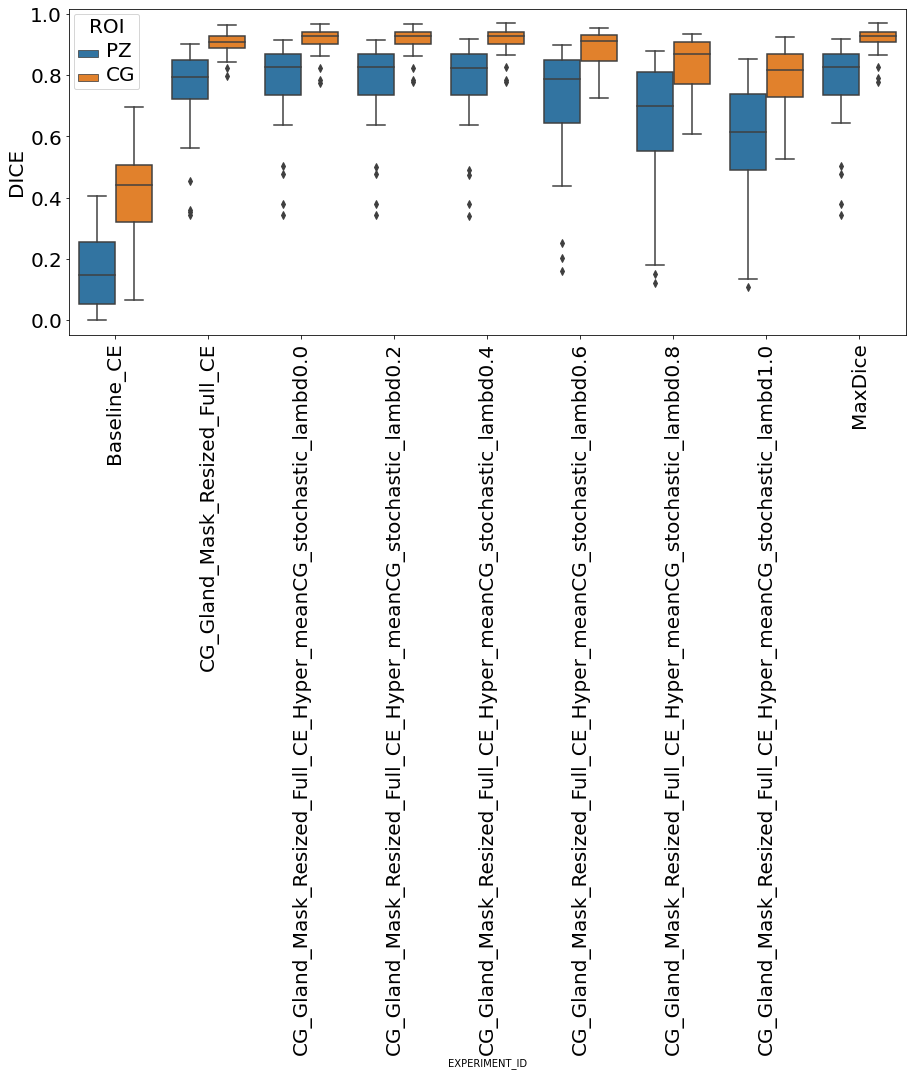

In [113]:
f, ax = plt.subplots(figsize=(15, 6))

ax = sns.boxplot(
    data=df_cat,
    x="EXPERIMENT_ID", 
    y="DICE", 
    hue="ROI")
_ = plt.xticks(rotation='vertical')

ax.tick_params(labelsize=20)
ax.set_ylabel("DICE",fontsize=20)

plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title

output_path_png = '../results/boxplot.pdf'
plt.savefig(output_path_png)

## T-test using scipy
`https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html`

In [149]:
from scipy.stats import wilcoxon

In [150]:
print(df_cat['EXPERIMENT_ID'].unique())
EXPERIMENT_ID = list(df_cat['EXPERIMENT_ID'].unique())
EXPERIMENT_ID.remove('CG_Gland_Mask_Resized_Full_CE')

evaluation_results = list()
for current_ROI in ROI:
    data=df_cat[df_cat['ROI']==current_ROI]
    
    data_base = data[data['EXPERIMENT_ID']=='CG_Gland_Mask_Resized_Full_CE']
    data_base.sort_values('SUBJECT_ID',inplace=True)
    dice_base  = data_base['DICE']
    # print(data_base['SUBJECT_ID'].tolist())

    
    for i in(range(data['EXPERIMENT_ID'].nunique()-1)):
        current_ID = EXPERIMENT_ID[i]

        data_lambd = data[data['EXPERIMENT_ID']==current_ID]
        data_lambd.sort_values('SUBJECT_ID',inplace=True)
        dice_lambd = data_lambd['DICE']
        # print(data_lambd['SUBJECT_ID'].tolist())

        # plot histogram
        # plt.figure('check', (9, 3))
        # plt.title(current_ID)
        # (dice_base - dice_lambd).plot.hist()
        # (dice_lambd - dice_base).plot.hist()
        # plt.show()
        
        # wilcoxon test
        df_metrics = pd.DataFrame()
        w, p = wilcoxon(dice_base.tolist(), dice_lambd.tolist())
        df_metrics['ROI'] = [current_ROI]
        #current_lambda = current_ID.split('_')[-1]
        df_metrics['EXPERIMENT_ID'] = [current_ID[-19:]]
        df_metrics['P_value'] = [p]
        evaluation_results.append(df_metrics)
    
# print(len(dice_base))
df_results = pd.concat(evaluation_results,ignore_index=True)
df_results

['Baseline_CE' 'CG_Gland_Mask_Resized_Full_CE'
 'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.0'
 'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.2'
 'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.4'
 'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.6'
 'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd0.8'
 'CG_Gland_Mask_Resized_Full_CE_Hyper_meanCG_stochastic_lambd1.0'
 'MaxDice']


/home1/jz729/anaconda3/envs/monai_pirads/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ROI,EXPERIMENT_ID,P_value
0,PZ,Baseline_CE,0.000002
1,PZ,stochastic_lambd0.0,0.000082
2,PZ,stochastic_lambd0.2,0.000106
3,PZ,stochastic_lambd0.4,0.000125
4,PZ,stochastic_lambd0.6,0.228880
5,PZ,stochastic_lambd0.8,0.000082
6,PZ,stochastic_lambd1.0,0.000002
7,PZ,MaxDice,0.000174
8,CG,Baseline_CE,0.000002
9,CG,stochastic_lambd0.0,0.000490
